## Introduction: Data, EDA and Algorithm


This notebook aimed at building a relative effective K-NN model.


### Data

The observation in dataframe(can be saved as ".csv file") will be something looking like:
    
Matrix form:

               RGB-data of image                             |                             Label
    np.array([[c11,...,c1n],[c21,...,c2n],[cr1,...,crn]])    |                              rhino
    
where r = row_num, c = column_num, and row_number = column_num here.
The data will contain 5 species of animals


### Data preprocessing

The data preprocessing here including:

+ Step 1: Image Augmentation
+ Step 2: Image Enhancement Technique: Transform RGB to Gray-255 images, sharpen images
+ Step 3: Image Segementation Technique: Finding Features


### Algorthim

the K-NN here will be a ensemble-like one(or a random forest one), in which:

+ Step1: K-NN is a lazy algorithm. Here, the data set will be spilted into 2 sets: training set vs. testing set

+ Step2: Building primitive models: 
based on the belief that K-NN will classify most images(it may not classify them correctly if there are more species, but here it's a small dataset) correctly within a bunch of k_neighbors values, building an ensemble-like model with mode successed from K-NN models trained with a bunch of selected subsets of training dataset, then testing them on the rest part of the training set(which is a validation set). The classification will built based on **Mode** gained from the model.

+ Step3: Hyperparameter tuning:
Select different sets of potential K-neighbors values, and test them

**Metrics of model performance**:
1. Accuracy
2. True positive vs. False positive
3. Balanced Accuracy


### EDA
**Including:**
1. Raw images presentation 
2. Augmented images presentation
3. Enhanced imgaes presentation
4. Presentation: Images used for models

In [7]:
import Augmentor
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

_______________
### Data Preprocessing, step 1: Image Augmentation

In [2]:
os.getcwd()

'C:\\Users\\zlf\\Dropbox\\UW\\479\\project'

In [3]:
cd selected_dataset/

C:\Users\zlf\Dropbox\UW\479\project\selected_dataset


In [4]:
##run the following two cells once per lifetime
path_to_data = os.getcwd()

p = Augmentor.Pipeline(path_to_data)

Initialised with 289 image(s) found.
Output directory set to C:\Users\zlf\Dropbox\UW\479\project\selected_dataset\output.

In [5]:
# Resize all images
p.resize(probability=1, width=128, height=128)

# Add some operations to an existing pipeline.

# add a horizontal flip operation to the pipeline:
p.flip_left_right(probability=0.4)

# add a vertical flip operation to the pipeline:
p.flip_top_bottom(probability=0.8)

# Add a rotate90 operation to the pipeline:
p.rotate90(probability=0.1)

# Add a random distortions
p.random_distortion(probability=0.4,  grid_width =4 , grid_height =4 , magnitude =5)

# Add a random erasing
p.random_erasing(probability=0.1, rectangle_area=0.2)

# Add a perspective transform
p.skew(probability=0.3, magnitude=0.2)

# Add a size preserving shearing
p.shear(probability=0.3, max_shear_left=10, max_shear_right=10)

# Here we sample 10,000 images from the pipeline.

# It is often useful to use scientific notation for specify
# large numbers with trailing zeros.
num_of_samples = int(2000)

# Now we can sample from the pipeline:
p.sample(num_of_samples)

Processing <PIL.Image.Image image mode=RGB size=128x128 at 0x20BB8E8AD68>: 100%|█| 2000/2000 [00:23<00:00, 86.70 Samples/s] 


### Data Preprocessing: Step 2: Image Enhancement

#### Sharpen/Denoise vs. Canny edge detection

In [7]:
cd rhino/

C:\Users\zlf\Dropbox\UW\479\project\selected_dataset\rhino


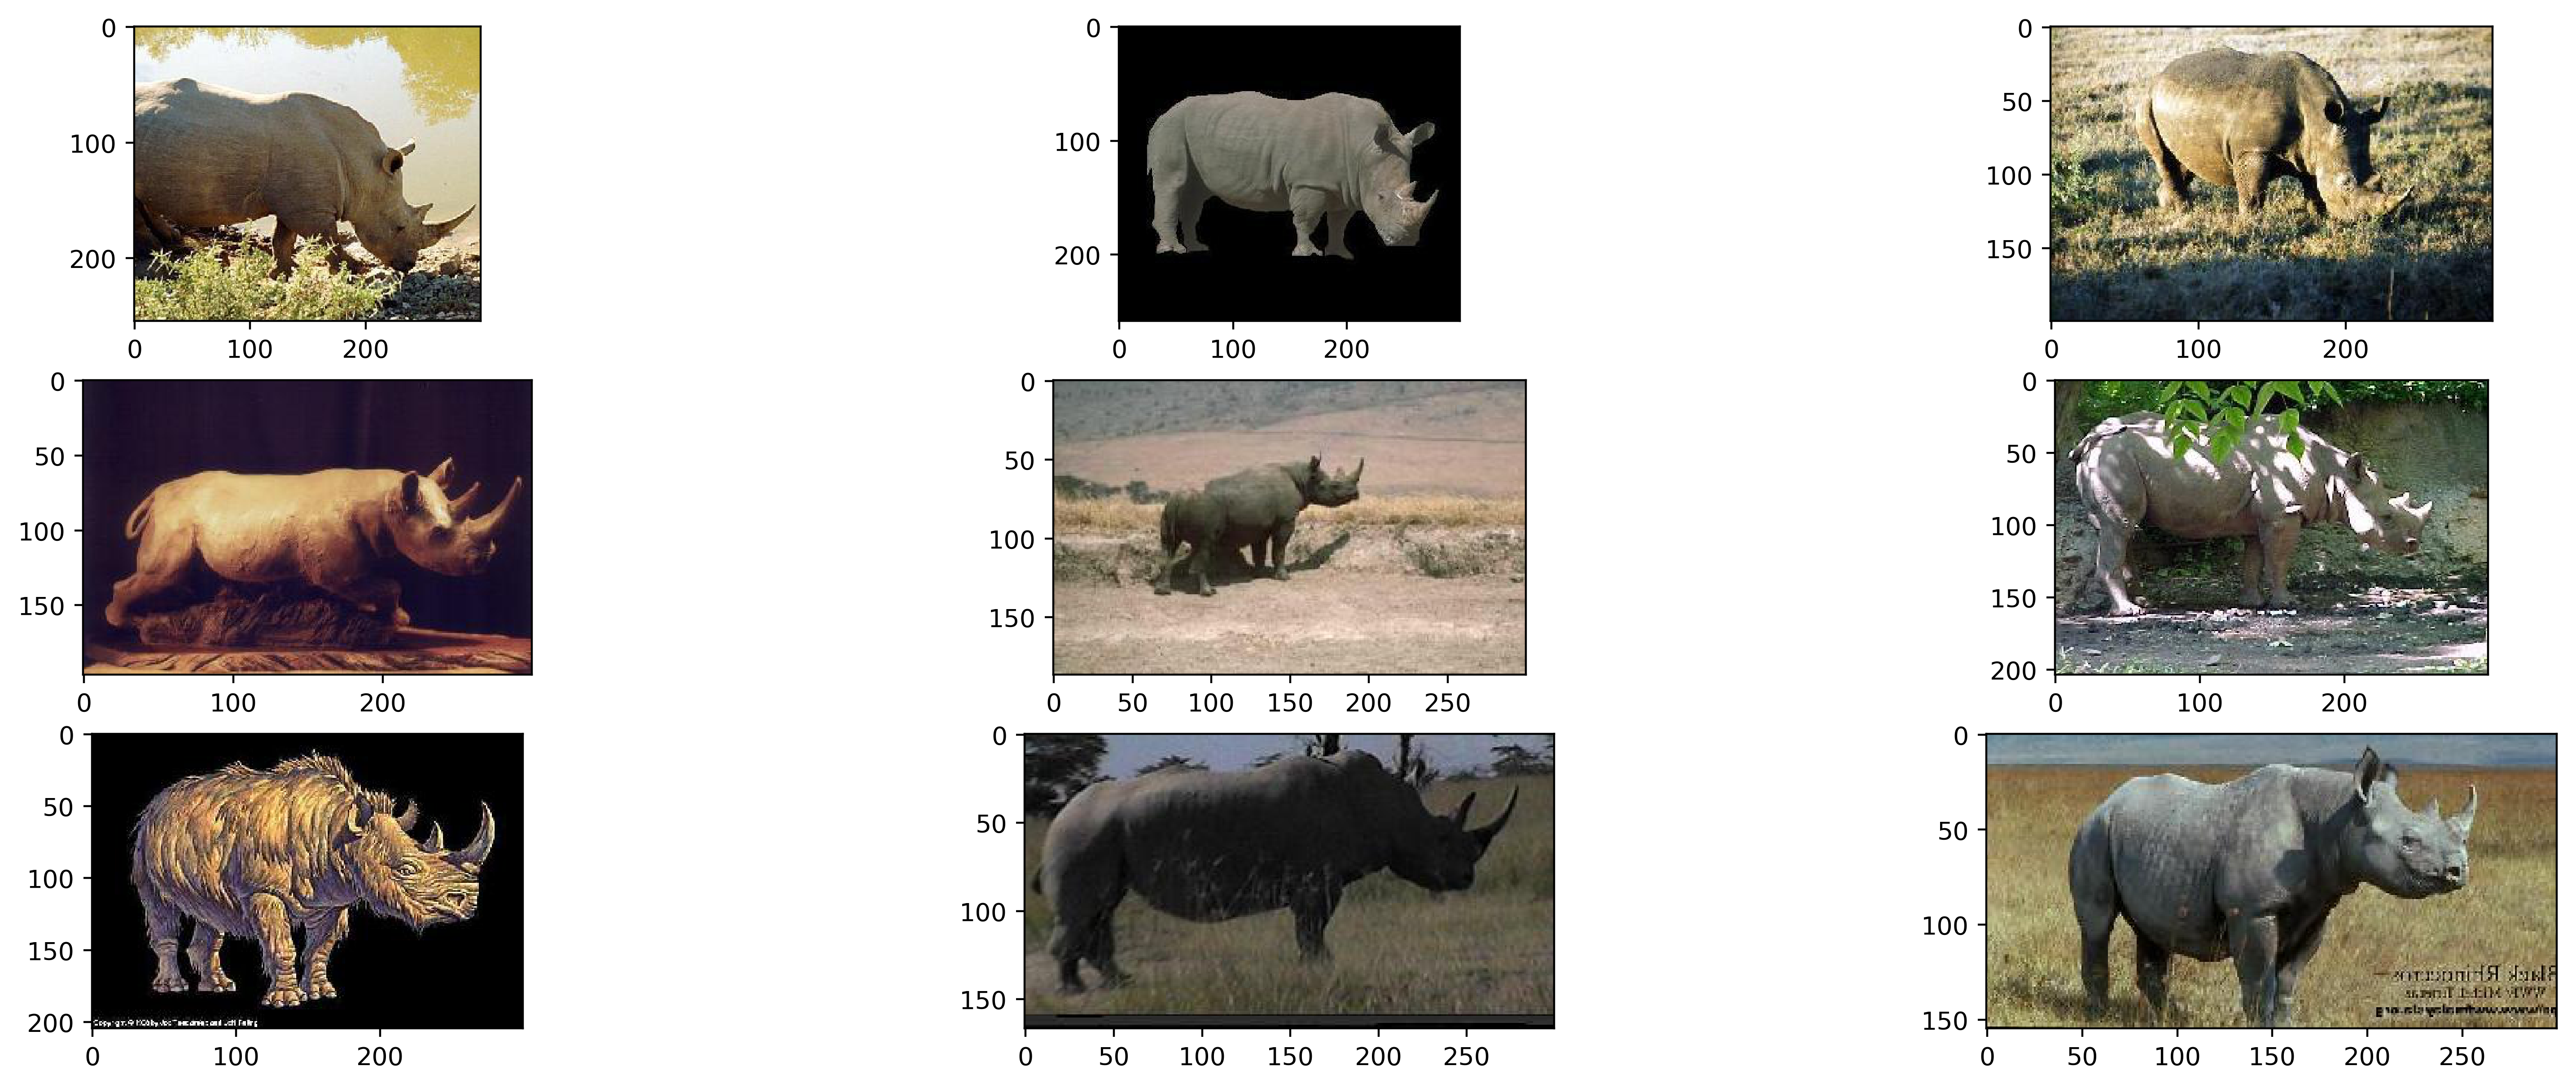

In [8]:
import matplotlib.image as mpimg
#working directory is under ""/selected_dataset/rhino" ,which are the raw images's directory
images = []  
for img_path in os.listdir()[:9]:   
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize = (20,10), dpi = 400)
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i+1)
    plt.imshow(image)

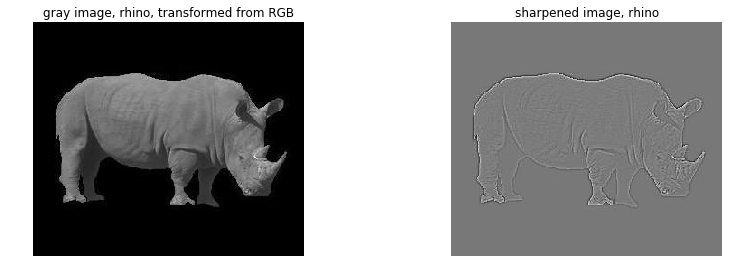

In [9]:
from scipy import ndimage

exp_im1 = mpimg.imread(os.listdir()[1])  #show an example~

#from RGB to gray-value image
ratio = [0.299, 0.587, 0.114]
def rgb2gray(rgb, ratio = [0.299, 0.587, 0.114]):
    return np.dot(rgb[...,:3], ratio)  
#the ratio can be modified for different formulas generating gray-valued images

#sharpening
exp_im1_gray = rgb2gray(exp_im1).astype(float)
filtered_exp_im1 = ndimage.gaussian_filter(exp_im1_gray, 1)

alpha = 50
sharpened_exp_im1 = exp_im1_gray + alpha*(exp_im1_gray - filtered_exp_im1)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(exp_im1_gray, cmap=plt.cm.gray)
plt.title("gray image, rhino, transformed from RGB")
plt.axis('off')
plt.subplot(122)
plt.imshow(sharpened_exp_im1, cmap=plt.cm.gray)
plt.title("sharpened image, rhino")
plt.axis('off')

plt.tight_layout()
plt.show()

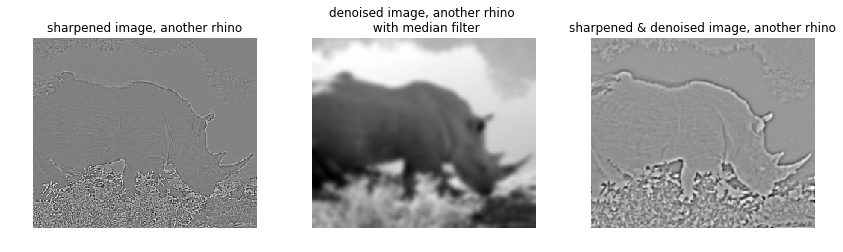

In [10]:
#sharpening
exp_im2 = mpimg.imread(os.listdir()[0])
exp_im2_gray = rgb2gray(exp_im2).astype(float)
filtered_exp_im2 = ndimage.gaussian_filter(exp_im2_gray, 1) #laplacian filter
denoise_exp_im2 = ndimage.gaussian_filter(exp_im2_gray, 3) #median filter: denoising

alpha = 30
sharpened_exp_im2 = exp_im2_gray + alpha*(exp_im2_gray - filtered_exp_im2)

sharpened_denosied_exp_im2 = denoise_exp_im2 + alpha*(denoise_exp_im2 - filtered_exp_im2)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(sharpened_exp_im2, cmap=plt.cm.gray)
plt.title("sharpened image, another rhino")
plt.axis('off')

plt.subplot(132)
plt.imshow(denoise_exp_im2, cmap=plt.cm.gray)
plt.title("denoised image, another rhino \n with median filter")
plt.axis('off')

plt.subplot(133)
plt.imshow(sharpened_denosied_exp_im2, cmap=plt.cm.gray)
plt.title("sharpened & denoised image, another rhino")
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# plt.figure(figsize=(12, 4))

# plt.subplot(121)
# sns.distplot(sharpened_denosied_exp_im2.reshape(-1))
# plt.title("sharpened+denoised")
# plt.subplot(122)
# sns.distplot(sharpened_exp_im2.reshape(-1))
# plt.title("sharpened")
# plt.show()

(-0.5, 299.5, 254.5, -0.5)

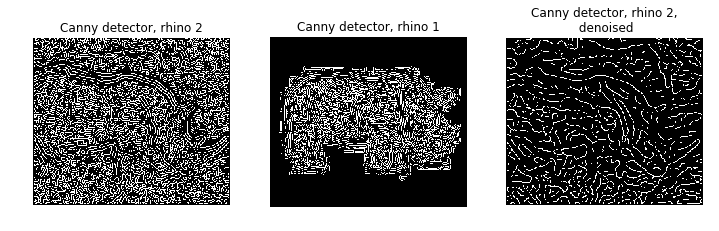

In [11]:
#try edge_detection
from skimage.feature import canny

from skimage import img_as_ubyte, img_as_float

edges_1 = canny(sharpened_denosied_exp_im2)
edges_2 = canny(sharpened_exp_im1)
edges_3 = canny(denoise_exp_im2)

plt.figure(figsize = (12, 4))

ax = plt.subplot(131)
ax.imshow(edges_1, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector, rhino 2')
ax.axis('off')

ax = plt.subplot(132)
ax.imshow(edges_2, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector, rhino 1')
ax.axis('off')

ax = plt.subplot(133)
ax.imshow(edges_3, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector, rhino 2,\n denoised')
ax.axis('off')

### Data Preprocessing: step 3: Image Segementation

#### Gradient Operator vs. Topological Morpology

(-0.5, 299.5, 254.5, -0.5)

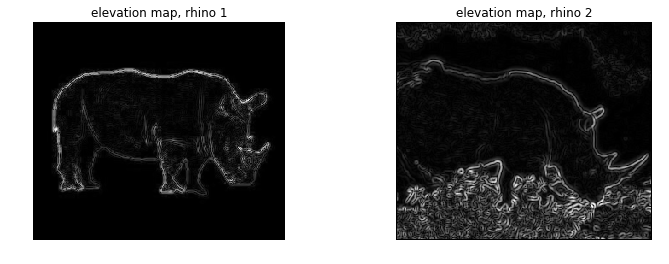

In [12]:
from skimage.filters import sobel
##dectect edge turns out to be silly idea by experiment, it shows no performance when background is not pure color,
##even denoise cannot help improve it.
elevation_map_2 = sobel(sharpened_denosied_exp_im2)   ##1, gradient operator
elevation_map_1 = sobel(sharpened_exp_im1)

plt.figure(figsize=(12,4))

ax = plt.subplot(121)
ax.imshow(elevation_map_1, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map, rhino 1')
ax.axis('off')

ax = plt.subplot(122)
ax.imshow(elevation_map_2, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map, rhino 2')
ax.axis('off')

(-0.5, 299.5, 254.5, -0.5)

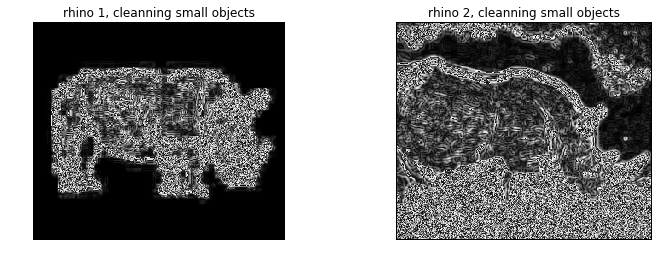

In [13]:
from skimage import morphology
## trying cleanning small objects
cleaned_rhino_1 = morphology.remove_small_objects(elevation_map_1.astype(np.uint8), 21)
cleaned_rhino_2 = morphology.remove_small_objects(elevation_map_2.astype(np.uint8), 21)

plt.figure(figsize=(12, 4))

ax = plt.subplot(121)
ax.imshow(cleaned_rhino_1, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title("rhino 1, cleanning small objects")
ax.axis("off")

ax = plt.subplot(122)
ax.imshow(cleaned_rhino_2, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title("rhino 2, cleanning small objects")
ax.axis("off")

(-0.5, 299.5, 254.5, -0.5)

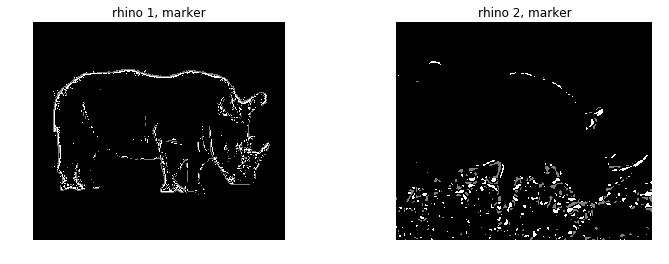

In [15]:
#Prepare mask(yep, that is the same thing as what we apply in Phtotshop), 
#more sophisticated masks can be prepared with more complicated algorithms,
#here the masks is based on binary masks

markers_1 = np.zeros_like(sharpened_exp_im1)

markers_1[sharpened_exp_im1 < np.percentile(sharpened_exp_im1, 2)] = 1
markers_1[sharpened_exp_im1 > np.percentile(sharpened_exp_im1, 98)] = 2

markers_2 = np.zeros_like(sharpened_denosied_exp_im2)
markers_2[sharpened_denosied_exp_im2 < np.percentile(sharpened_denosied_exp_im2, 2)] = 1
markers_2[sharpened_denosied_exp_im2 > np.percentile(sharpened_denosied_exp_im2, 98)] = 2

plt.figure(figsize=(12, 4))

ax = plt.subplot(121)
ax.imshow(markers_1 , cmap = plt.cm.gray, interpolation='nearest')
ax.set_title('rhino 1, marker')
ax.axis('off')

ax = plt.subplot(122)
ax.imshow(markers_2, cmap = plt.cm.gray, interpolation='nearest')
ax.set_title('rhino 2, marker')
ax.axis('off')

(-0.5, 299.5, 254.5, -0.5)

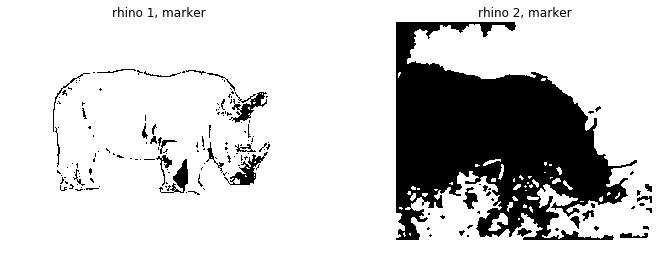

In [16]:
seg_rhino_1 = morphology.watershed(elevation_map_1, markers_1) ##2 Topological Morphology
seg_rhino_2 = morphology.watershed(elevation_map_2, markers_2)

plt.figure(figsize=(12, 4))

ax = plt.subplot(121)
ax.imshow(seg_rhino_1 , cmap = plt.cm.gray, interpolation='nearest')
ax.set_title('rhino 1, marker')
ax.axis('off')

ax = plt.subplot(122)
ax.imshow(seg_rhino_2, cmap = plt.cm.gray, interpolation='nearest')
ax.set_title('rhino 2, marker')
ax.axis('off')

C:\Scripts\Anaconda3\lib\site-packages\skimage\color\colorlabel.py:162: UserWarning: Negative intensities in `image` are not supported
  warn("Negative intensities in `image` are not supported")
C:\Scripts\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Scripts\Anaconda3\lib\site-packages\skimage\color\colorlabel.py:162: UserWarning: Negative intensities in `image` are not supported
  warn("Negative intensities in `image` are not supported")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


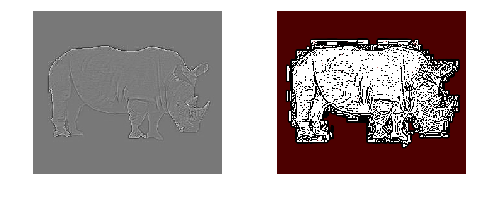

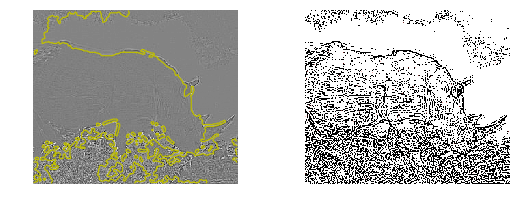

In [18]:
#How does topological morphology perform? let's label them on the raw image
from skimage.color import label2rgb 

segmentation_1 = ndimage.binary_fill_holes(seg_rhino_1 - 1)
labeled_rhino_1, _ = ndimage.label(seg_rhino_1)
image_label_overlay_1 = label2rgb(labeled_rhino_1, image=sharpened_exp_im1)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(sharpened_exp_im1, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation_1, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay_1, interpolation='nearest')

for a in axes:
    a.axis('off')

segmentation_2 = ndimage.binary_fill_holes(seg_rhino_2 - 1)
labeled_rhino_2, _ = ndimage.label(seg_rhino_2)
image_label_overlay_2 = label2rgb(labeled_rhino_2, image=sharpened_exp_im2)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(sharpened_exp_im2, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation_2, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay_2, interpolation='nearest')

for a in axes:
    a.axis('off')    
    
    
plt.tight_layout()

plt.show()

____________________

### Standard Procedure of Processing Images to Model Dataset

1. Sharpen images
2. Method I: sobel operator; Method II: morphology
3. Ensemble data

In [5]:
#### Reading data
# From images to vetors
# require scipy.ndimage; \
from skimage.filters import sobel
import skimage.morphology as morphology
import matplotlib.image as mpimg
from skimage.filters import sobel
from scipy import ndimage

#from RGB to gray-value image
ratio = [0.299, 0.587, 0.114]
def rgb2gray(rgb, ratio = [0.299, 0.587, 0.114]):
    return np.dot(rgb[...,:3], ratio)  
#the ratio can be modified for different formulas generating gray-valued images

def image_2_array(image_filename, shaperen = True, shaperen_coef = 30, sobel_op = True, denoise = False, 
                  watershed_op = False, mark_threshold_lower = 2, mark_threshold_upper = 98): 
    """
        This function is to transfer image into corresponding vector of form:
    gray-data of image                        |                           Label
    np.array([[c1,...,cn],[]])                |                            rhino
    """
    
    image_tensor = mpimg.imread(image_filename)
    im_processed = rgb2gray(image_tensor).astype(float)
    if (int(len(image_tensor.reshape(-1))) % 3 != 0):
        return np.nan
    else:
        if shaperen:
            filtered_im = ndimage.gaussian_filter(im_processed, 1)
            sharpened_im = im_processed + shaperen_coef*(im_processed - filtered_im)
            im_processed = sharpened_im
    
        if denoise:
            im_processed = ndimage.gaussian_filter(im_processed, 3)
        
        if sobel_op:
            im_processed = sobel(im_processed)
            
        if (watershed_op & sobel_op):
            markers = np.zeros_like(im_processed)
            
            markers[im_processed < np.percentile(im_processed, mark_threshold_lower)] = 1
            markers[im_processed > np.percentile(im_processed, mark_threshold_upper)] = 2
            
            seg_op = morphology(im_processed, markers)
            im_processed = seg_op
    
        return(im_processed)
    
##-------------------------------------------------------------------------------
    
def read_oneGeneric_file(filename,*args, **kwargs):
    """
        This function is to apply the first function to one generic image
    say, transfer all bass(a kind of fish) images into vector form
    """

    allFiles = os.listdir(filename)
    arrayed_images_oneGeneric = [] #create an empty list to hold matrix of one generic data
    count = 0
    labelname = filename.split("//")[1]
    for f in allFiles:
        f = filename + "/" + f
        arrayed_images_oneGeneric.append(image_2_array(f, args))
        count += 1
    return arrayed_images_oneGeneric, labelname, count #can be modified, count or labelname etc. can be omitted in output
##-----------------------------------------------------------------------------


def read_wholeGenericFile(whole_generic_filename,*args, **kwargs):
    """
        This function is to apply the first function to all generic images
    say, transfer all 21 kinds animals' images into vector form
    """

    allGenericFilename = os.listdir(whole_generic_filename)

    oneGeneric_file_path = []
    
    for oneGeneric_file in allGenericFilename:
        oneGeneric_file = whole_generic_filename + "/" + oneGeneric_file
        oneGeneric_file_path.append(oneGeneric_file)
        
    return(oneGeneric_file_path)
##------------------------------------------------------------------------------

def with_all_2_df(oneGeneric_file_path,*args, **kwargs):
    """
     This function is to generate a dataframe to save vetors processed by read_wholeGenericFile() function
    """
   
    df_wholeGeneric = pd.DataFrame({"non_divided_channel": [], 
                                    "label_name": []})
    
    for file_path in oneGeneric_file_path:
        oneGeneric_data, oneGeneric_label, oneGeneric_count = read_oneGeneric_file(file_path)
        df_temp = pd.DataFrame({"non_divided_channel": oneGeneric_data, 
                                    "label_name": [oneGeneric_label]*oneGeneric_count})
        df_wholeGeneric = pd.concat([df_wholeGeneric, df_temp], ignore_index=True)
    
    return df_wholeGeneric

In [8]:
os.getcwd()

'C:\\Users\\zlf\\Dropbox\\UW\\479\\project'

In [9]:
cd selected_dataset/

C:\Users\zlf\Dropbox\UW\479\project\selected_dataset


#### First model dataset: based on Sobel operator

In [10]:
oneGeneric_file_path = read_wholeGenericFile("output/")
df_species_Sobel = with_all_2_df(oneGeneric_file_path)  #with sharpen and sobel, takes a long time

In [11]:
df_species_Sobel.head()

,non_divided_channel,label_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body


#### Second model dataset: based on Topological morphology

In [15]:
df_species_Morphology = with_all_2_df(oneGeneric_file_path, watershed_op = True) #with topological morphology, takes a long time

In [16]:
df_species_Morphology.head()

,non_divided_channel,label_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body


In [17]:
def generate_counting_table(df, counting_label):
    num_OneGeneric = np.zeros(len(np.unique(df[counting_label])))
    name_dict = {}
    for ele_index in range(len(np.unique(df[counting_label]))):
        Generic_name = np.unique(df[counting_label])[ele_index]
        num_OneGeneric[ele_index] = len(df[df[counting_label] == Generic_name]['label_name']) 
        name_dict[Generic_name] = int(num_OneGeneric[ele_index])
    return(pd.DataFrame(list(name_dict.items()),columns=['animal_name','num_images']))

Text(0.5,1,': dataset based on Morphology')

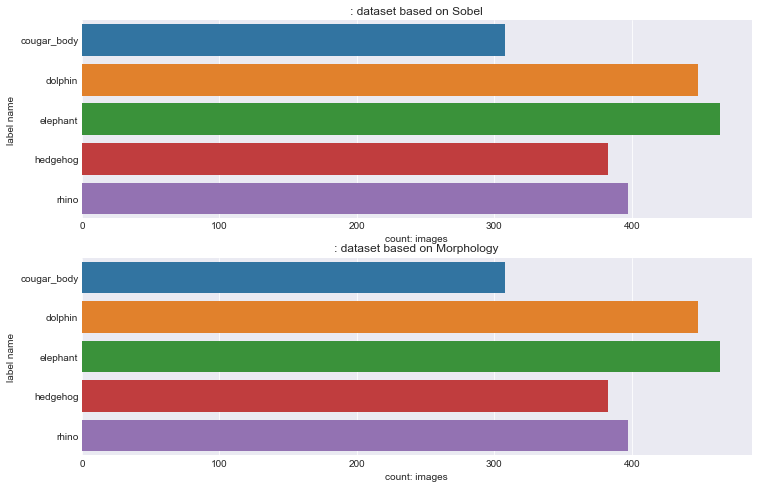

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize = (12, 8))

ax = plt.subplot(211)
ax = sns.barplot(y = 'animal_name', x = 'num_images', data = generate_counting_table(df_species_Sobel, "label_name"))
ax.set_xlabel("count: images")
ax.set_ylabel("label name")
ax.set_title(": dataset based on Sobel")

ax = plt.subplot(212)
ax = sns.barplot(y = 'animal_name', x = 'num_images', data = generate_counting_table(df_species_Morphology, "label_name"))
ax.set_xlabel("count: images")
ax.set_ylabel("label name")
ax.set_title(": dataset based on Morphology")

___________________
### SVM Based On Sobel 

In [12]:
df_species_Sobel.head(7)

,non_divided_channel,label_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
5,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body
6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",cougar_body


In [13]:
df_species_Sobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
non_divided_channel    1961 non-null object
label_name             2000 non-null object
dtypes: object(2)
memory usage: 31.3+ KB


In [14]:
df_species_Sobel.isnull().any()

non_divided_channel     True
label_name             False
dtype: bool

In [15]:
##Encoding labels
d = {}
label_num = 1
for obj in np.unique(df_species_Sobel['label_name']):
    d[obj] = label_num
    label_num+=1

df_species_Sobel['label_num'] = df_species_Sobel['label_name'].map(d)

model_data_1 = pd.DataFrame(df_species_Sobel.dropna())

model_data_1['len_X'] = model_data_1['non_divided_channel'].apply(lambda x: len(x.reshape(-1)))


In [16]:
np.unique(model_data_1['len_X'])

array([16384], dtype=int64)

In [17]:
128*128

16384

In [18]:
from sklearn.model_selection import train_test_split

X = model_data_1['non_divided_channel'].apply(lambda x: x.reshape(-1))
y = model_data_1['label_num']
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                   test_size = 0.3,
                                                   random_state = 123,
                                                   shuffle = True,
                                                   stratify = y)

In [19]:
# os.getcwd()

# np.save("X", X.values)

# np.save("y", y.values)
#run this cell once only!!! takes a long time
X_train.head(7)

529     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1464    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
410     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1228    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
889     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1636    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1786    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: non_divided_channel, dtype: object

In [28]:
# Import Library
from sklearn import svm
# Here we have, X_train (predictor) and y_train (target) of training dataset and X_test(predictor) y_test of test dataset
# Create SVM classification object 
naive_svm = svm.SVC(kernel='poly', C=1, gamma=1) 
# there is various option associated with it, like changing kernel, gamma and C value.
# Train the model using the training sets and check score
naive_svm.fit(list(X_train), y_train)
naive_svm.score(list(X_train), y_train)

1.0

In [62]:
#Predict Output
predicted = naive_svm.predict(list(X_test))

In [65]:
naive_svm.score(list(X_test), y_test)

0.6668918918918919

In [29]:
from sklearn.model_selection import RandomizedSearchCV


def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# specify parameters and distributions to sample from
param_dist = {"kernel":['rbf', 'poly', 'sigmoid'], "gamma":[1, 0.1, 0.05, 0.01], "C":[1, 20, 50, 100]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(naive_svm, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)


random_search.fit(np.array(list(X_train)), np.array(y_train))

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.466 (std: 0.026)
Parameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 20}

Model with rank: 1
Mean validation score: 0.466 (std: 0.026)
Parameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 50}

Model with rank: 1
Mean validation score: 0.466 (std: 0.026)
Parameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 1}

Model with rank: 1
Mean validation score: 0.466 (std: 0.026)
Parameters: {'kernel': 'poly', 'gamma': 0.01, 'C': 20}

Model with rank: 1
Mean validation score: 0.466 (std: 0.026)
Parameters: {'kernel': 'poly', 'gamma': 0.01, 'C': 100}



In [20]:
from sklearn import svm
best_svm = svm.SVC(kernel='poly', C=1, gamma=0.1) 
# there is various option associated with it, like changing kernel, gamma and C value.
# Train the model using the training sets and check score
best_svm.fit(list(X_train), y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
best_svm.score(list(X_test), y_test)

0.4923599320882852

In [23]:
best_predicted = best_svm.predict(list(X_test))

Normalized confusion matrix


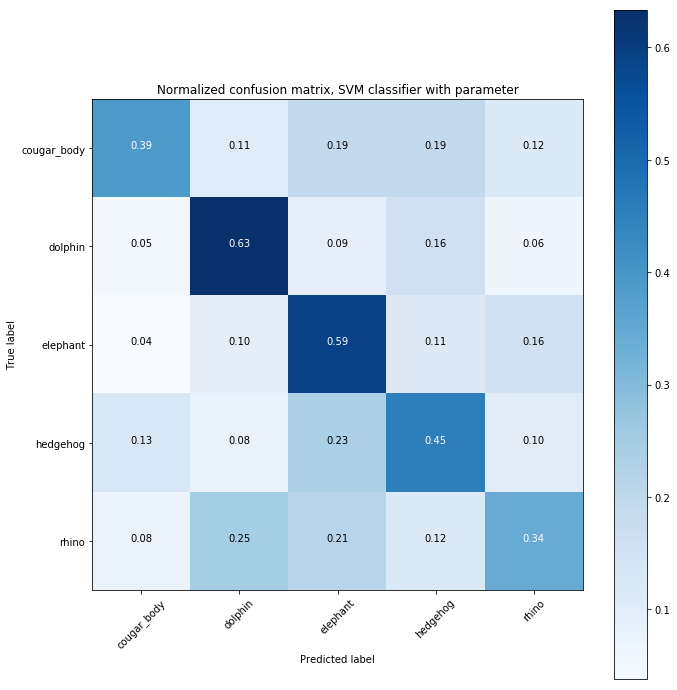

In [24]:
#accuracy(confusion matrix): for best params of a certain model
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#def class_name
class_names = np.unique(df_species_Sobel['label_name']) #change the name of dataset if necessary
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, best_predicted)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize = (10,10)) #add dpi = 400 or other numbers if high resolution image is required
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix, SVM classifier with parameter')

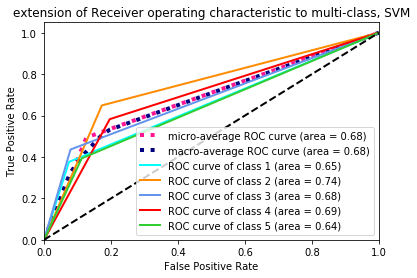

In [26]:
#AUC ROC 
##only draw the picture for the best param of a certain
#since definition of AUC ROC is for binary variable, first of all, we need to binarizing our result
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

##binarize y_test:
y_test_bi = label_binarize(y_test, [1, 2, 3, 4, 5])

##binarize predict value:
knn_bi = OneVsRestClassifier(best_svm) #change classifier here
y_score = knn_bi.fit(list(X_train), y_train).predict(list(X_test))
y_score_bi = label_binarize(y_score, [1,2,3,4,5])
#method may vary according to estimator, if the function is RandomForest or SVC 
#y_score_bi = YourClassifier.fit(list(X_train), y_train).predict(list(X_test)).decision_function(list(X_test))
lw = 2
n_classes = 5
fpr = dict() #fp rate
tpr = dict() #tp rate
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bi[:, i], y_score_bi[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bi.ravel(),  y_score_bi.ravel()) #.ravel() is the same as .reshape(-1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'limegreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format((i+1), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('extension of Receiver operating characteristic to multi-class, SVM')
plt.legend(loc="lower right")
                                          
plt.show() #no need of this line if you have run %matplotlib inline